A

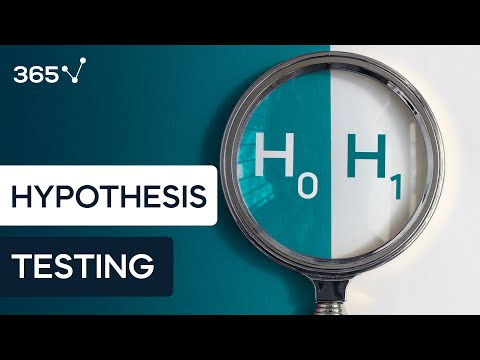

In [1]:
from IPython.display import YouTubeVideo
# First pre-lecture video: 
# "Hypothesis testing. Null vs alternative
# https://www.youtube.com/watch?v=ZzeXCKd5a18
YouTubeVideo('ZzeXCKd5a18', width=800, height=500)

B

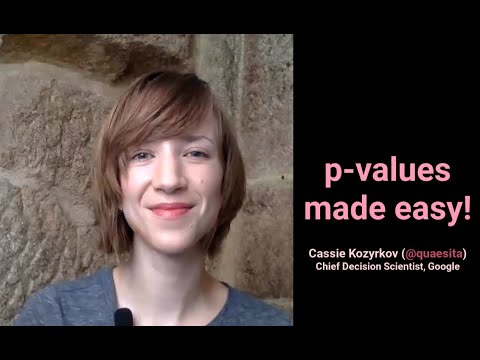

In [2]:
from IPython.display import YouTubeVideo
# Second pre-lecture video
# "What is a p-value"
# https://www.youtube.com/watch?v=9jW9G8MO4PQ
YouTubeVideo('9jW9G8MO4PQ', width=800, height=500)

1. 
The key difference between ideas that can and cannot be examined and tested statistically is whether there is data to test, ideas that have no data cannot be statistically interpreted.
The key criteria of a good null hypothesis is that it should be testable (have data that can be statistically analysed) and it should be specific enough to be contradictable; meaning that it focuses on a specific outcome and any other one would disprove it. 
The difference between a null hypothesis and an alternative hypothesis is that the null hypothesis is the one that is being tested, with the aim to disprove it, whearas the alternative hypothesis is challenging the null hypothesis and represents all other outcomes besides that of the null hypothesis. 

2.  
The sentence above is explaining that when testing the null hypothesis (prediction of outcome), the outcomes of the values are relative to the average of the entire population that is being observed, not the average of the sample values used to find a larger scope of outcomes. This allows to prove/disprove the null hypothesis by seeing if the average of the population is equal to the one in the null hypothesis, in which case the null hypothesis is proven. 

3. 
When calculating a p-value, we assume that the null hypothesis is always right as the p-value is relative to the predicted value in the null hypothesis. The p-value determines the probability of attaining a value as or more exreme than that of the null hypothesis.

4. 
A smaller p-value (probability of getting a value equal to or more extreme than the hypothesized one) makes the null hypothesis (predicted outcome) look more ridiculous as it means that the probability of attaining the value proposed in the null hypothesis is very low, showing that the null hypothesis is most likely false.

5. Güntürkün (2003) recorded how kissing couples tilt their heads. 80 out of 124 couples, or 64.5% tilted their heads to the right. Simulate a p-value using a "50/50 coin-flipping" model for the assumption of the null hypothesis  that the population of humans don't have left or right head tilt tendencies when kissing, and use the table below to determine the level of evidence we have against .

In [1]:
import numpy as np

# Set the parameters
n_trials = 10000  # Number of simulated trials
n_couples = 124  # Number of couples in each trial
observed_prop = 0.645  # Observed proportion of right tilts

# Simulate coin flips
flips = np.random.choice(['R', 'L'], size=(n_trials, n_couples), p=[0.5, 0.5])

# Calculate the proportion of right tilts in each trial
right_tilt_props = np.sum(flips == 'R', axis=1) / n_couples

# Count how many trials have a proportion at least as extreme as the observed proportion
extreme_trials = np.sum(right_tilt_props >= observed_prop)

# Calculate the p-value
p_value = extreme_trials / n_trials

print("Simulated p-value:", p_value)

Simulated p-value: 0.0006


The p-value I found is 0.0006, which is significanty smaller than 0.001, meaning that this is very strong evidence against the null hypothesis.

6.
A smaller p-value can not definitely prove the null hypothesis to be false, when finding the p-value, since p-values can't determine whether the null hypothesis is true or false, in this case it is not possible to prove if Fido is guilty or innocent.  

7.

95% Confidence Interval: -0.7245261951008418 1.581306964039484
One-sided p-value: 0.479


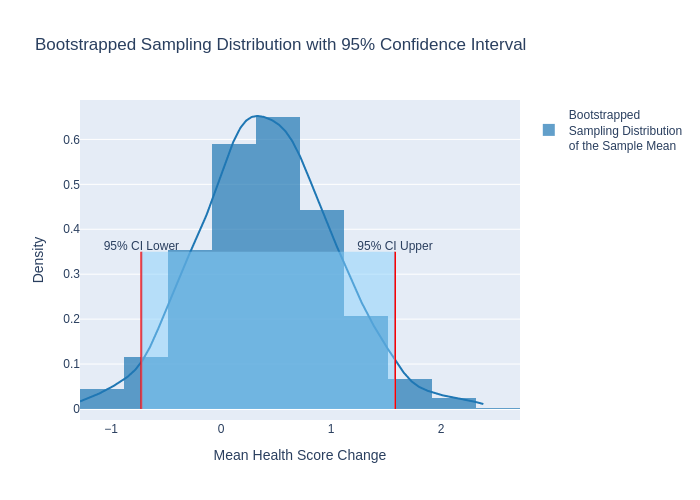

In [7]:
import numpy as np
import pandas as pd
import plotly.figure_factory as ff
import plotly.graph_objects as go

# Define the patient_data DataFrame
np.random.seed(130)  # For reproducibility
n_patients = 100  # Number of patients
# Simulate some health score changes (can be any range, here assumed between -10 and +10)
health_score_changes = np.random.uniform(-10, 10, n_patients)
patient_data = pd.DataFrame({'HealthScoreChange': health_score_changes})

# Bootstrapping parameters
number_of_simulations = 1000 
n_size = len(patient_data)  # Sample size
bootstrap_means = np.zeros(number_of_simulations)  # Array to store bootstrapped means

# Original sample mean
original_mean = patient_data['HealthScoreChange'].mean()

for i in range(number_of_simulations):
    # Bootstrap sample with replacement
    sample = patient_data.sample(n=n_size, replace=True)
    bootstrap_means[i] = sample['HealthScoreChange'].mean()  # Store the bootstrapped mean

# Calculating the 95% confidence interval
ci_lower = np.percentile(bootstrap_means, 2.5)
ci_upper = np.percentile(bootstrap_means, 97.5)
print("95% Confidence Interval:", ci_lower, ci_upper)

# One-sided p-value calculation (testing if the mean is greater than the original mean)
p_value = np.sum(bootstrap_means >= original_mean) / number_of_simulations
print("One-sided p-value:", p_value)

# Create histogram data
hist_data = [bootstrap_means]
group_labels = ['Bootstrapped<br>Sampling Distribution<br>of the Sample Mean']
fig = ff.create_distplot(hist_data, group_labels, 
                         show_hist=True, show_rug=False, bin_size=0.4)

# Add lines for the confidence interval
ci_y = 0.35  # Adjust height as needed
fig.add_shape(type="line", x0=ci_lower, y0=0, x1=ci_lower, y1=ci_y,
              line=dict(color="Red", width=2), name="95% CI Lower")
fig.add_shape(type="line", x0=ci_upper, y0=0, x1=ci_upper, y1=ci_y,
              line=dict(color="Red", width=2), name="95% CI Upper")

# Add a rectangle for the confidence interval region
fig.add_shape(type="rect", x0=ci_lower, y0=0, x1=ci_upper, y1=ci_y,
              fillcolor="LightSkyBlue", opacity=0.5, line_width=0)

# Add annotations for the confidence interval lines
fig.add_trace(go.Scatter(x=[ci_lower, ci_upper], 
                         y=[ci_y + 0.01, ci_y + 0.01],  
                         text=["95% CI Lower", "95% CI Upper"], 
                         mode="text", showlegend=False))

# Update layout
fig.update_layout(
    title="Bootstrapped Sampling Distribution with 95% Confidence Interval",
    xaxis_title="Mean Health Score Change", 
    yaxis_title="Density"
)

# Show the figure (use PNG renderer for submissions)
fig.show(renderer="png")  # Use `fig.show(renderer="png")` for GitHub and MarkUs submissions

changed in the code; how this changes the interpretation of the hypothesis test; and whether or not we should indeed expect the p-value to be smaller in the "one tailed" versus "two tailed" analysis.
This new code has changed from the original one as the calculation of the p-value was changed to be one sided, considering only one extreme. Resultantly, the interpretation of the hypothesis test is different, as it is focused on variance in only one direction from the original mean. We should expect a smaller p-value in the "one tailed" analysis as it focusses on a smaller area, so there is less probability of the value falling in that range than that of the two-tailed test as the range is much larger.

8.
Problem Introduction
In this report, we are recreating the famous "Fisher's Tea Experiment" at a larger scale in the STA130 class with 80 students, of which 49 were able to properly identify whether tea or milk was poured first. This experiment aims to prove the null hypothesis that the outcome is random (50/50), and that students are not actually able to determine which was poured first: H_0:p=0.5 (equal amount of students who answer right and wrong).
The alternative hypothesis supports that  students do have some ability to determine whether tea or milk was poured first: H_1:p>0.5 (the porportion of students who can answer correctly is higher).

Quantitative Analysis
The purpose of the usage of statistics to address H_0 the population parameter of interest is that through investigating the proportion of right to wrong aswers to be equal, we are then easily able to use the variance of the proportions of the sample values from the population parameter to see whether the results of the experiment are truly random or most likely not. 
    Method
    In order to run this experiment, I will run a one-tailed hypothesis test (to see probability of p>0.5). I am using 1000 repititions.

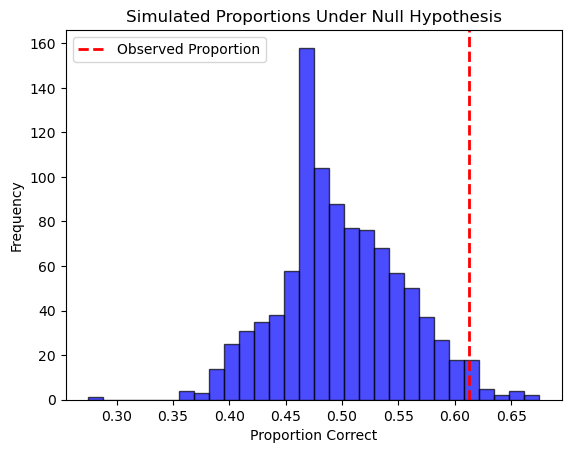

Observed Proportion: 0.6125
P-Value: 0.0310


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Setting a random seed for reproducibility
np.random.seed(42)

# Parameters
n_students = 80
n_correct = 49
p_null = 0.5  # Null hypothesis proportion

# Observed proportion
observed_proportion = n_correct / n_students

# Simulation
number_of_simulations = 1000
simulated_successes = np.random.binomial(n_students, p_null, size=number_of_simulations)
simulated_proportions = simulated_successes / n_students

# Calculate p-value
p_value = np.mean(simulated_proportions >= observed_proportion)

# Plotting the results
plt.hist(simulated_proportions, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(observed_proportion, color='red', linestyle='dashed', linewidth=2, label='Observed Proportion')
plt.title('Simulated Proportions Under Null Hypothesis')
plt.xlabel('Proportion Correct')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print(f"Observed Proportion: {observed_proportion:.4f}")
print(f"P-Value: {p_value:.4f}")

The observed proportion is 0.6125, meaning that more students were able to correctly identify which tea had the milk poured first. The p-value I found is 0.031, which is between 0.05 and 0.01, meaning that it provides moderate evidence against the null hypothesis. This means that the null hypothesis cannot be rejected, but that students can potentially identify when tea or milk was poured first, but it is most likely by chance.

AI Summary

Chatgpt: In this interaction, I requested assistance with analyzing a variation of Fisher's tea experiment involving STA130 students. The analysis aimed to determine whether these students could accurately identify the order in which milk and tea were poured into a cup.

Key requests included:

Code Development: I sought Python code to simulate the experiment, specifically asking for a method to calculate a p-value using a one-tailed hypothesis test. I requested the code to be designed for 1,000 simulations, which was provided.
Statistical Analysis: I requested an explanation of the statistical methods used in the analysis.
Summary Generation: Finally, I requested a summary of the entire interaction, encapsulating the objectives, methodologies, results, and conclusions of the analysis.

Chatbot: Summary of Interaction: Simulating a p-value for Head-Tilting Preference in Kissing Couples
The interaction begins with a request to simulate a p-value for testing the null hypothesis that humans have no left or right head-tilting preference while kissing. The user mentioned a study by Güntürkün (2003), which is not mentioned in the sources, where 64.5% of observed couples tilted their heads to the right. A coin-flipping model, representing the null hypothesis of a 50/50 chance of tilting either way, was proposed to simulate the data.
The initial responses explained the concept of a p-value and outlined the steps for the simulation. However, they noted that the sources primarily focused on data summarization, coding practices using Python (with libraries like pandas and NumPy), and did not contain direct information on p-value simulation or hypothesis testing for head-tilting preferences.
The user then requested the code for this simulation. The subsequent response provided Python code, which was not from the sources and might need independent verification, to perform the simulation. The code utilized concepts from the conversation history, like the observed proportion of right tilts (64.5%), and implemented the coin-flipping model.
The code, explained step by step, simulates numerous trials of coin flips, calculates the proportion of right tilts in each trial, compares these proportions to the observed proportion, and finally computes the p-value based on the number of trials as extreme as or more extreme than the observed data.
The responses emphasized that:
●
The provided sources do not contain information on simulating p-values or conducting the specific hypothesis test described.
●
The number of simulated trials affects the p-value's precision (more trials generally lead to better precision).
●
For a more formal analysis, statistical software or a hypothesis test like a binomial test (not found in the sources) could be used.
The interaction highlights the ability to apply statistical concepts, like hypothesis testing and simulation, to real-world scenarios, even when the provided sources do not directly address the specific problem. It also emphasizes the importance of verifying information and code not derived from the provided sources.